# Assigment Hypothesis Testing Concepts
Mochamad Fiqi Sabila

## Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/marketing_campaign (1).csv", delimiter='\t')

# **"Apakah terdapat perbedaan rata-rata pengeluaran antara pelanggan dengan tingkat pendidikan yang berbeda?"**

# 1. Eksplorasi dan Statistik Deskriptif


*   Pahami struktur dataset yang digunakan dan identifikasi variabel penting.
*   Gunakan teknik eksplorasi data untuk mengenali pola dan karakteristik data.
*   Tampilkan ringkasan statistik deskriptif yang memberikan gambaran tentang distribusi data.
*   Interpretasikan hasil eksplorasi untuk memahami distribusi data dan kemungkinan permasalahan dalam dataset.


*   Goal: Memahami distribusi dan karakteristik data sebelum melakukan uji hipotesis.

### Struktur Dataset

In [ ]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [ ]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [ ]:
df.shape

(2240, 29)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

Dari dataset ini kita dapat memahami,



*   Dataset memiliki 2240 rows dan 29 colomns

*   25 kolom dengan data type (int), 3 kolom dengan data type (object), dan kolom income memiliki data type (float)



In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
df[['Income', 'Recency', 'MntWines', 'NumWebPurchases', 'Year_Birth']].describe()

,Income,Recency,MntWines,NumWebPurchases,Year_Birth
count,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,49.109375,303.935714,4.084821,1968.805804
std,25173.076661,28.962453,336.597393,2.778714,11.984069
min,1730.000000,0.000000,0.000000,0.000000,1893.000000
25%,35303.000000,24.000000,23.750000,2.000000,1959.000000
50%,51381.500000,49.000000,173.500000,4.000000,1970.000000
75%,68522.000000,74.000000,504.250000,6.000000,1977.000000
max,666666.000000,99.000000,1493.000000,27.000000,1996.000000


df.describe disini saya hanya mengambil 5 kolom yang sekiranya penting,



*   Pendapatan pelanggan memiliki rata-rata sekitar 52247.251354, dengan nilai minimum sebesar 1730.000000 dan maksimum 666666.000000. Hal ini menunjukkan adanya variasi tingkat pendapatan yang cukup besar di antara pelanggan. Beberapa nilai yang sangat rendah atau tinggi mungkin merupakan outlier dan perlu ditinjau lebih lanjut.

*   Kolom Recency mengukur berapa hari yang telah berlalu sejak pembelian terakhir pelanggan. Nilainya berkisar dari 0.000000 hingga 99.000000 hari, dengan rata-rata sekitar 49.109375. Nilai yang lebih rendah menunjukkan pelanggan yang lebih aktif baru-baru ini.

*   Pengeluaran untuk produk wine (MntWines) menunjukkan rata-rata sebesar 303.935714, dengan rentang antara 0.000000 hingga 1493.000000. Ini adalah kategori dengan pengeluaran tertinggi dibandingkan produk lainnya, yang mengindikasikan bahwa wine mungkin merupakan produk favorit pelanggan.

*   Rata-rata pelanggan melakukan 4.084821 pembelian melalui website, dengan minimum 0.000000 dan maksimum 27.000000. Ini bisa mencerminkan seberapa sering pelanggan menggunakan website, dan penting untuk melihat preferensi belanja mereka.

*   Usia pelanggan dihitung dari Year_Birth, dengan rata-rata usia sekitar 1968.805804 tahun. Nilai usia tertua dan termuda masing-masing adalah 1893.000000 dan 1996.000000
, yang menunjukkan variasi demografis cukup luas dalam kelompok pelanggan ini.


> pada deskripsi singkat ini terlihat bahwa masih harus dilakukan pengecekan terhadap outlier. Karena ada banyak jumlah outlier yang mana itu sangan mempengaruhi rata-rata nilai dari masih masing kolom.




## Distribusi data

In [ ]:
df.groupby('Education')['MntWines'].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,203.0,198.182266,261.475727,0.0,9.00,48.0,347.00,1215.0
Basic,54.0,7.240741,30.763207,0.0,1.00,2.0,4.75,228.0
Graduation,1127.0,284.268855,308.212588,0.0,23.00,183.0,458.50,1492.0
Master,370.0,333.075676,354.100379,2.0,37.25,179.0,542.00,1486.0
PhD,486.0,404.495885,390.327036,2.0,52.00,276.5,698.75,1493.0


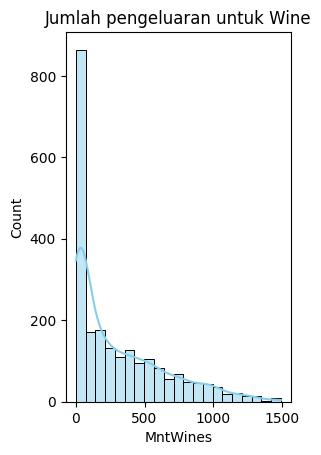

In [ ]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['MntWines'], kde=True, color='skyblue')
plt.title('Jumlah pengeluaran untuk Wine')
plt.show()

### skewness MntWines

In [ ]:
print(f'Skewness: {df["MntWines"].skew()}')

Skewness: 1.1757705637550502


> Skewness ~ 0  -> simetris (normal distribution)

> Skewness > 0  -> miring ke kanan/positif (right skewed)

> Skewness < 0  -> miring ke kiri/negatif (left skewed)

Skewness pada MntWines menunjukan right skewed / miring kanan/positif. Namun hal ini juga dipengaruhi dengan adanya outlier. Ditunjukan pada rentan nilai 0, histogram menunjukan nilai melebihi 800 yang mana terlihat tidak wajar.

### Distribusi Pendidikan

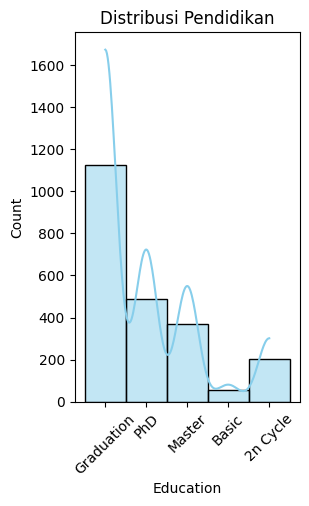

In [ ]:
# Histogram
plt.subplot(1, 2, 1)
sns.histplot(df['Education'], kde=True, color='skyblue')
plt.title('Distribusi Pendidikan')
plt.xticks(rotation=45)
plt.show()

In [ ]:
df['Education'].value_counts()

,count
Education,
Graduation,1127
PhD,486
Master,370
2n Cycle,203
Basic,54


Sebaran data pada kolom Education memiliki 4 grup yang berbeda, dimulai dari nilai terbanyak Graduation sebanyak 1127, Phd sebanyak 486, Master sebanyak 370, 2n Cycle sebanyak 203, dan Basic sebanyak 54.

# 2. Uji Hipotesis


*   Definisikan hipotesis yang relevan sesuai dengan tujuan analisis.

*   Pilih metode uji hipotesis yang sesuai dengan jenis data dan tujuan analisis.

*   Pastikan pemilihan metode (misalnya t-test, ANOVA, atau Chi-Square) dilakukan dengan mempertimbangkan asumsi statistik yang diperlukan.

*   Hitung nilai p-value dan interpretasikan hasilnya untuk menentukan apakah H0 dapat diterima atau ditolak.

*   Goal: Menguji hipotesis menggunakan metode statistik yang sesuai dan menginterpretasikan hasilnya.

### Untuk menjawab pertanyaan **"Apakah terdapat perbedaan rata-rata pengeluaran antara pelanggan dengan tingkat pendidikan yang berbeda?"**

saya menggunakan metode ANOVA, karena terdapat lebih dari 3 kelomok pada data.

## Sebaran pengeluaran wine berdasarkan pendidikan

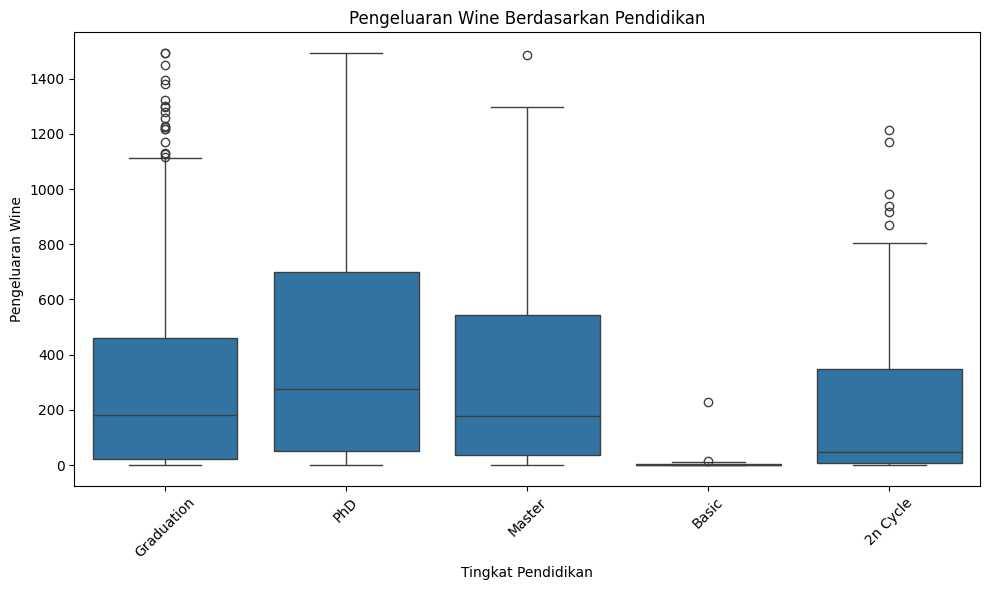

In [ ]:
# Boxplot MntWines v Pendidikan
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Education', y='MntWines')
plt.title('Pengeluaran Wine Berdasarkan Pendidikan')
plt.xlabel('Tingkat Pendidikan')
plt.ylabel('Pengeluaran Wine')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



*   Berdasarkan boxplot di atas, dapat terlihat bahwa terdapat perbedaan distribusi pengeluaran wine antar kelompok tingkat pendidikan. Pelanggan dengan latar belakang pendidikan PhD cenderung memiliki pengeluaran wine yang lebih tinggi.

*   Sebaliknya, kelompok dengan pendidikan Basic memiliki pengeluaran yang paling rendah, serta sebaran yang kecil, menunjukkan bahwa kelompok ini relatif jarang atau sedikit menghabiskan uang untuk wine.

*   Selain itu, terlihat adanya outlier (titik di luar boxplot) di hampir semua kelompok, terutama pada Graduation dan Master, yang menunjukkan ada sebagian kecil pelanggan di kelompok tersebut dengan pengeluaran wine yang sangat tinggi dibandingkan mayoritas.


## Normalitas per grup

In [ ]:
from scipy.stats import shapiro
from scipy import stats

In [ ]:
for edu_level in df['Education'].unique():
    sample = df[df['Education'] == edu_level]['MntWines']
    stat, p = stats.shapiro(sample)
    print(f'{edu_level}: p-value = {p}')

Graduation: p-value = 1.2409456967895172e-31
PhD: p-value = 4.2325723381573464e-19
Master: p-value = 9.122906263816798e-19
Basic: p-value = 9.070989563945683e-16
2n Cycle: p-value = 1.3338540585151764e-16


> Sebelum melakukan analisis ANOVA, dilakukan uji normalitas pada setiap grup pendidikan untuk memastikan bahwa data dalam setiap grup berdistribusi normal. Hasil uji normalitas menunjukkan p-value sebagai berikut:


*   Grup Graduation memiliki p-value sebesar 1.24 × 10⁻³¹,

*   Grup PhD sebesar 4.23 × 10⁻¹⁹,

*   Grup Master sebesar 9.12 × 10⁻¹⁹,

*   Grup Basic sebesar 9.07 × 10⁻¹⁶,

*   dan grup 2n Cycle sebesar 1.33 × 10⁻¹⁶.


> Karena semua p-value jauh di bawah tingkat signifikansi 0,05, maka dapat disimpulkan bahwa data pada masing-masing grup tidak berdistribusi normal. Dengan demikian, asumsi normalitas untuk ANOVA tidak terpenuhi pada data ini.


> Saya asumsikan karna terdapat banyak outlier pada data, maka hasil dari masing masing uji normalitas menghasilkan data yang tidak normal.

## Homogenitas varians

In [ ]:
groups = [df[df['Education'] == level]['MntWines'] for level in df['Education'].unique()]
stat, p = stats.levene(*groups)
print(f'Uji Levene: p-value = {p}')

Uji Levene: p-value = 1.1187386514102212e-25


> Berdasarkan hasil uji Levene ini, varians antar grup tidak sama, sehingga asumsi homogenitas varians untuk ANOVA tidak terpenuhi.



### Hasil Uji Normalitas per grup dan Homogenitas varians


> Kedua hasil uji menyatakan distibusi yang tidak normal dan homogenitas varians tidak terpenuhi

> kedua hasil uji tersebut tidak terpenuhi karena adanya jumlah outliers yang signiffikan







## transformasi logaritma

karna hasil uji normalitas dan homogenitas tidak normal

In [ ]:
numerical_cols = ['MntWines']

# Terapkan transformasi log(x+1) untuk menghindari log(0)
for col in numerical_cols:
    df[f'log_{col}'] = np.log1p(df[col])

# Tampilkan data setelah transformasi
print(df[['Education'] + [f'log_{col}' for col in numerical_cols]].head())

# Grouping berdasarkan Education
grouped = df.groupby('Education')

# Hitung rata-rata log transformasi per grup Education
mean_log = grouped[[f'log_{col}' for col in numerical_cols]].mean()
print(mean_log)

    Education  log_MntWines
0  Graduation      6.455199
1  Graduation      2.484907
2  Graduation      6.056784
3  Graduation      2.484907
4         PhD      5.159055
            log_MntWines
Education               
2n Cycle        3.951060
Basic           1.241716
Graduation      4.648307
Master          4.942176
PhD             5.210178


In [ ]:
for edu_level in df['Education'].unique():
    sample = df[df['Education'] == edu_level]['log_MntWines']
    stat, p = stats.shapiro(sample)
    print(f'{edu_level}: p-value = {p}')

Graduation: p-value = 2.323349656751461e-23
PhD: p-value = 2.6778321794741386e-15
Master: p-value = 6.320522981873671e-11
Basic: p-value = 4.946613591025847e-06
2n Cycle: p-value = 1.4507389650319846e-07


In [ ]:
groups = [df[df['Education'] == level]['log_MntWines'] for level in df['Education'].unique()]
stat, p = stats.levene(*groups)
print(f'Uji Levene: p-value = {p}')

Uji Levene: p-value = 1.2894302804787135e-13


### Hasil Uji Normalitas per grup dan Homogenitas varians setelah transformasi

tidak terjadi perubahan yang signifikan, dan distribusi data masih tidak normal

## Metode ANOVA

In [ ]:
from scipy.stats import f_oneway

groups = df.groupby("Education")["MntWines"].apply(list)
stat, p = f_oneway(*groups)
print(f"F-stat: {stat}, P-value: {p}")

F-stat: 29.419649996664226, P-value: 7.104155194866556e-24


P-value menunjukan nilai (P-value: 7.104155194866556e-24)

dapat diaartikan H0 ditolak, dan terdapat perbedaan rata-rata pengeluaran wine pada latar belakang pendidikan

In [ ]:
df.groupby("Education")["MntWines"].apply(list)

,MntWines
Education,
2n Cycle,"[4, 6, 3, 688, 25, 1, 25, 207, 53, 47, 12, 162..."
Basic,"[6, 1, 0, 1, 1, 4, 1, 16, 8, 2, 2, 1, 2, 0, 4,..."
Graduation,"[635, 11, 426, 11, 235, 5, 194, 3, 53, 84, 86,..."
Master,"[520, 233, 1012, 8, 112, 482, 40, 13, 3, 650, ..."
PhD,"[173, 76, 14, 28, 1006, 867, 384, 684, 96, 702..."


In [ ]:
df.groupby("Education")["MntWines"].describe()

,count,mean,std,min,25%,50%,75%,max
Education,,,,,,,,
2n Cycle,203.0,198.182266,261.475727,0.0,9.00,48.0,347.00,1215.0
Basic,54.0,7.240741,30.763207,0.0,1.00,2.0,4.75,228.0
Graduation,1127.0,284.268855,308.212588,0.0,23.00,183.0,458.50,1492.0
Master,370.0,333.075676,354.100379,2.0,37.25,179.0,542.00,1486.0
PhD,486.0,404.495885,390.327036,2.0,52.00,276.5,698.75,1493.0


Dapat terlihat rata rata terbesar pengeluaran wine terdapat pada latar pendidikan Phd 404.495885

### Catatan Mengenai ANOVA

Meskipun uji ANOVA sempat dilakukan, hasilnya tidak dapat dijadikan dasar pengambilan keputusan karena data tidak memenuhi asumsi-asumsi dasar ANOVA, yaitu:

  1. Normalitas distribusi residual per grup tidak terpenuhi (p-value sangat kecil),

  2. Homogenitas varians antar grup juga tidak terpenuhi.

Selain itu, keberadaan outlier yang signifikan turut memengaruhi distribusi data dan memperkuat ketidaksesuaian asumsi ANOVA. Oleh karena itu, hasil ANOVA tidak valid dan sebaiknya tidak digunakan sebagai dasar interpretasi.

Sebagai gantinya, dipilih uji non-parametrik Kruskal-Wallis yang lebih sesuai untuk kondisi data seperti ini.

## Uji Non-Parametrik

ini dilakukan karna hasil uji normalitas dan homogenitas varian sebelum dan sesudah transformasi tidak memenuhi standar

In [ ]:
from scipy.stats import kruskal

# Ambil data per grup berdasarkan kolom Education
group1 = df[df['Education'] == 'Graduation']['log_MntWines'].dropna()
group2 = df[df['Education'] == 'PhD']['log_MntWines'].dropna()
group3 = df[df['Education'] == 'Master']['log_MntWines'].dropna()
group4 = df[df['Education'] == 'Basic']['log_MntWines'].dropna()
group5 = df[df['Education'] == '2n Cycle']['log_MntWines'].dropna()

# Lakukan uji Kruskal-Wallis
stat, p = kruskal(group1, group2, group3, group4, group5)

print(f'Statistik uji: {stat:.4f}, p-value: {p:.4e}')

Statistik uji: 207.1798, p-value: 1.0739e-43


# Interpretasi dan Kesimpulan

1. Berdasarkan hasil uji Kruskal-Wallis, diperoleh nilai statistik uji sebesar 207.1798 dengan p-value yang sangat kecil (1.0739e-43). Nilai p-value yang jauh di bawah tingkat signifikansi 0,05 menunjukkan bahwa terdapat perbedaan median pengeluaran wine (MntWines) yang signifikan antar kelompok tingkat pendidikan. Artinya, tingkat pendidikan memiliki pengaruh nyata terhadap pola pengeluaran pelanggan terhadap produk wine.


2. Uji Kruskal-Wallis dipilih karena data tidak memenuhi asumsi normalitas dan homogenitas varians, bahkan setelah dilakukan transformasi. Oleh karena itu, hasil dari uji non-parametrik ini dapat dipercaya sebagai indikasi kuat bahwa perbedaan yang diamati bukan disebabkan oleh kebetulan.


3. Implikasi

  1. Temuan ini dapat digunakan sebagai dasar dalam pengambilan keputusan strategis, khususnya dalam segmentasi pasar dan penargetan promosi. Misalnya:

  2. Pelanggan dengan tingkat pendidikan lebih tinggi (seperti PhD dan Master) memiliki kecenderungan pengeluaran yang lebih besar terhadap produk wine.

  3. Strategi pemasaran dapat disesuaikan untuk lebih menargetkan kelompok ini dengan menawarkan produk wine premium, program loyalitas khusus, atau kampanye edukatif yang lebih personal.


4. Keterbatasan

  1. Analisis ini hanya mempertimbangkan satu variabel pengeluaran (MntWines) dan satu faktor pembeda (Education). Faktor lain seperti pendapatan, usia, atau status perkawinan bisa saja juga memengaruhi perilaku pengeluaran.

  2. Data yang digunakan mengandung missing value, namun dalam analisis ini missing value diabaikan, sehingga bisa memengaruhi representasi keseluruhan data.

  3. Outlier belum ditangani secara khusus, padahal keberadaannya dapat memengaruhi persepsi sebaran data dan hasil visualisasi, meskipun uji Kruskal-Wallis relatif lebih tahan terhadap outlier dibanding uji parametrik.

  4. Hasil ini bersifat deskriptif terhadap data yang tersedia, sehingga tidak secara langsung mengindikasikan hubungan sebab-akibat.

# CATATAN PENTING

> Seharusnya sebelum melakukan hypothesis testing, perlu dilakukan feature engineering.


> Keputusan saya tidak/belum meng-handling missing values dan outlier karena materi ini dikerjakan sebelum materi feuter egineering

